In [84]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [85]:
#read result.csv.  This file contains the results of the SQL query defined by Anisa and Kyle
attendance = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
attendance = attendance[['SchoolID','School','SchoolType','No_of_Program','FrRedLnch_PercentEligible','PercentofStudentsNotChronicallyAbsent','Enrollment']]
attendance

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
1,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
3,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
4,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
5,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
6,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
7,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
8,4555,Academy for Character Education,H,1,NaN,NaN,117.0
9,4555,Academy for Character Education,H,1,NaN,NaN,117.0


In [86]:
#We are only interested in elementary schools for this analysis
#attendance = attendance.query("SchoolType == 'H'").drop_duplicates()
attendance = attendance.drop_duplicates()
attendance

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
5,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
8,4555,Academy for Character Education,H,1,NaN,NaN,117.0
11,4440,Academy of Arts and Academics,H,1,55.68,68.7,352.0
14,4540,Academy of International Studies (at Woodburn),H,1,76.95,71.1,308.0
17,27,Adams Elementary School,E,4,21.43,93.0,378.0
20,503,Adams Elementary School,E,7,40.54,87.2,444.0
23,498,Adel Elementary School,E,1,NaN,95.0,8.0
26,707,Adrian Elementary School,E,1,67.20,88.9,186.0


In [87]:
# remove records with missing data
attendance = attendance.dropna()
attendance

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
5,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
11,4440,Academy of Arts and Academics,H,1,55.68,68.7,352.0
14,4540,Academy of International Studies (at Woodburn),H,1,76.95,71.1,308.0
17,27,Adams Elementary School,E,4,21.43,93.0,378.0
20,503,Adams Elementary School,E,7,40.54,87.2,444.0
26,707,Adrian Elementary School,E,1,67.20,88.9,186.0
32,1353,Agnes Stewart Middle School,M,2,72.46,82.0,570.0
35,694,Aiken Elementary School,E,2,80.80,89.5,276.0


## Plot:  Number of Programs (No_of_Program - xaxis) by PercentofStudentsNotChronicallyAbsent (yaxis)

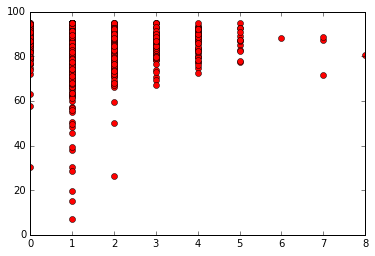

In [88]:
plt.plot(attendance['No_of_Program'], attendance['PercentofStudentsNotChronicallyAbsent'], 'ro')
plt.show()


### This shows that there is positive relationship between Number of programs and attendance (more programs means better attendance)

## Plot:  Poverty (FrRedLnch_PercentEligible - xaxis) by PercentofStudentsNotChronicallyAbsent

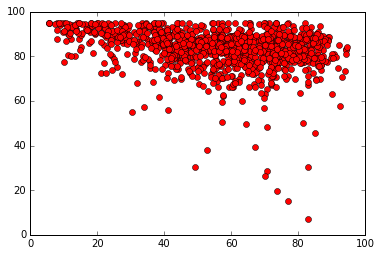

In [92]:
plt.plot(attendance['FrRedLnch_PercentEligible'], attendance['PercentofStudentsNotChronicallyAbsent'],'ro')
plt.show()


### This plot suggests a negative relationship between poverty and attendance (more poverty means more students chronically absent)

## Regression:  Predicting Absence with Povery and Number of Programs

In [93]:
res = ols("PercentofStudentsNotChronicallyAbsent ~ No_of_Program + FrRedLnch_PercentEligible", data=attendance).fit()
print(res.summary())


                                      OLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.112
Model:                                               OLS   Adj. R-squared:                  0.110
Method:                                    Least Squares   F-statistic:                     67.80
Date:                                   Wed, 18 May 2016   Prob (F-statistic):           1.87e-28
Time:                                           20:05:23   Log-Likelihood:                -3866.3
No. Observations:                                   1078   AIC:                             7739.
Df Residuals:                                       1075   BIC:                             7754.
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

# As also shown by plot above, poverty contributes negatively to attendance (higher poverty means less attendance).  This is indicated by the coef value of -0.1501 for FrRedLnch_PercentEligible) and this coeficient is statistically significant (P>|t| = 0.000)

# Key Finding:  Number of programs (1-8) contributes positively to attendance (more programs means better attendance).  Coeficient of 1.4691 is statistically significant (P>|t| = 0.000)

## Plot of Number of Programs predicting with Poverty removed 

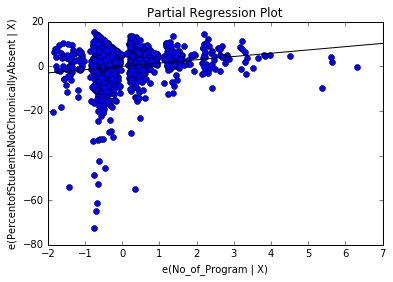

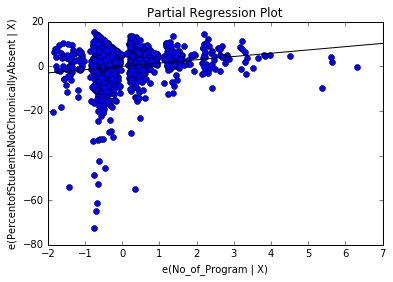

In [91]:
sm.graphics.plot_partregress("PercentofStudentsNotChronicallyAbsent", "No_of_Program", exog_others=["FrRedLnch_PercentEligible"], data=attendance, title_kwargs={}, obs_labels=False)

## These plots show a positive best fit line corresponding to the coef of 1.4691 with the effect of poverty removed